In [85]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

## 碰撞的数值模拟

#### 基本思路，时间离散化，迭代计算

1. 初始化两个类 分别代表小球和振动平面
2. 时间离散化，确定迭代条件
3. 输入初始参数进行计算
4. 结果输出保存
5. 可视化
6. 确定碰撞周期

In [3]:
class ball(object):
    '''
    小球
    '''
    global G
    def __init__(self,y_0,v_0,r,e):
        '''
        初始化速度和位置，以及小球半径和碰撞系数
        '''
        self.y=y_0
        self.v=v_0
        self.r=r
        self.a=G
        self.e=e
    def update(self,dt):
        '''
        迭代算法
        '''
        self.y+=self.v*dt+self.a*dt**2/2
        self.v+=self.a*dt
    def knock(self,y,V):
        '''
        碰撞算法
        '''
        self.y+=self.r-(self.y-y)
        self.v=(1-self.e)*V+self.e*self.v

class plane(object):
    '''
    振动平面
    '''
    def __init__(self,A,w):
        '''
        初始化振动平面的振幅和角速度
        '''
        self.A=A
        self.w=w
    def get_y(self,t):
        '''
        振动平面的位置
        '''
        # y=A cos(wt)
        return self.A*np.cos(self.w*t)
    def get_v(self,t):
        return -self.A*self.w*np.sin(self.w*t)

In [4]:
def visualize(data,width,visual_dpi=100):
    '''
    数据的可视化
    '''
    limit=len(data)
    time=np.linspace(0,limit,limit)
    
    f=plt.figure()
    plt.xlabel("time/dt")
    plt.ylabel("y/m")
    plt.title("Overview")
    f.dpi=visual_dpi
    plt.plot(time,data)
    plt.show()
    
#     g1=plt.subplot(121)
    plt.xlabel("time/dt")
    plt.ylabel("y/m")
    plt.title("Begining")
    plt.plot(time[:width],data[:width])
    plt.show()
#     g2=plt.subplot(122)
    plt.xlabel("time/dt")
    plt.ylabel("y/m")
    plt.title("Stable")
    plt.plot(time[limit-width:limit],data[limit-width:limit])
    plt.show()

In [5]:
def find_hills(arr):
    '''
    寻找函数峰值
    返回峰值数值和bool声明序列
    '''
    arr=np.array(arr)
    is_hill=np.zeros(len(arr))
    for i in range(1,len(arr)-1):
        if arr[i-1]<arr[i]>arr[i+1]:
            is_hill[i]=1
    return (arr[is_hill==1],is_hill)

In [6]:
def find_global_hills(arr):
    '''
    寻找极大值序列的极大值，标志一个周期的峰顶
    '''
    arr=np.array(arr)
    mask=find_hills(arr)[1]
    is_global=np.zeros(len(mask))
    indexes=np.arange(len(mask))[mask==1]
    for i in range(1,len(indexes)-1):
        if arr[indexes[i-1]]<arr[indexes[i]]>arr[indexes[i+1]]:
            is_global[indexes[i]]=1
    return (arr[is_global==1],is_global)

In [7]:
def get_period(arr,dt):
    '''
    计算两个峰值之间的时间间隔
    '''
    indexs=np.arange(len(arr))[arr==1]
    return dt*(Series(indexs).shift(-1)-Series(indexs))

In [8]:
def main(ball,plane,resolution=40,g=-9.8,num_of_period=200,visual=True,visual_width=5,visual_dpi=100):
    '''
    主函数，确定离散时间dt长度，计算时长
    
    ball: the ball class
    plane: the plane class
    dt: time interval
    g: G
    resolution: data points per period
    num_of_period: time range, the unit is period, which is resolution times dt
    visual: whether do visualization
    visual_width: the times of period to visualize
    '''
    limit=resolution*num_of_period
    dt=(2*3.14/plane.w)/resolution
    limit=dt*limit
    t=0
    with open("data.txt",'w') as f:
        while t<limit:
            ball.update(dt)
            t+=dt
            if np.abs(plane.get_y(t)-ball.y)<ball.r:
                ball.knock(plane.get_y(t),plane.get_v(t))
            f.write(str(ball.y)+'\n')
            if t%30==0:
                print(t,'finished!')
                
    with open("data.txt") as f:
        data=f.readlines()
    data=list(map(lambda x:float(x[:-1]),data))
    
    if visual:
        visualize(data,visual_width*resolution,visual_dpi)
    
    period=get_period(find_hills(data)[1],dt).mean()
    n=period/(2*3.14/plane.w)
    print("The period of the ball is {0}, which is {1} times the period of the plane.".format(period,n))
    return (period,n)

### Exploration.1 探索平板振幅对最终稳态的影响

**控制变量**

振幅分别为0.001,0.007,0.07,0.7

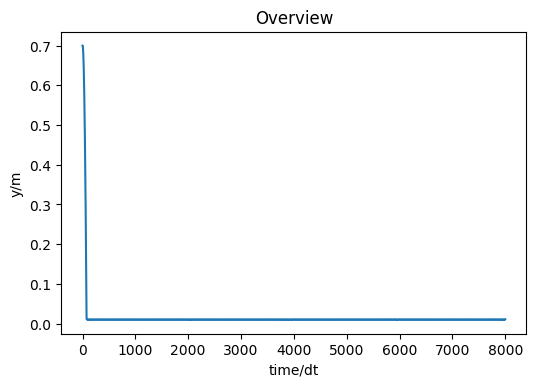

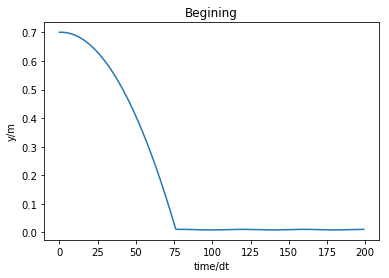

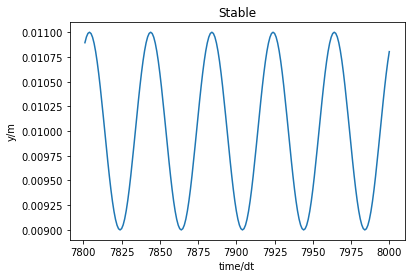

The period of the ball is 0.20106060606060622, which is 1.0053030303030313 times the period of the plane.


(0.20106060606060622, 1.0053030303030313)

In [52]:
G=-9.8
ball_=ball(0.7,0.10,0.01,0.7)
plane_=plane(0.001,10*3.14)
main(ball_,plane_)

振幅0.001 终态稳定

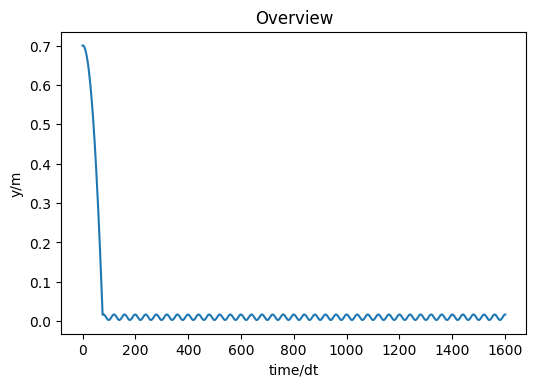

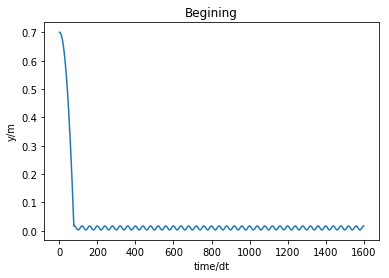

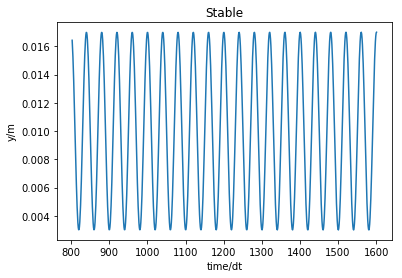

The period of the ball is 0.20513157894736853, which is 1.0256578947368427 times the period of the plane.


(0.20513157894736853, 1.0256578947368427)

In [51]:
G=-9.8
ball_=ball(0.7,0.10,0.01,0.7)
plane_=plane(0.007,10*3.14)
main(ball_,plane_,num_of_period=40,visual_width=60)

振幅0.007 终态稳定

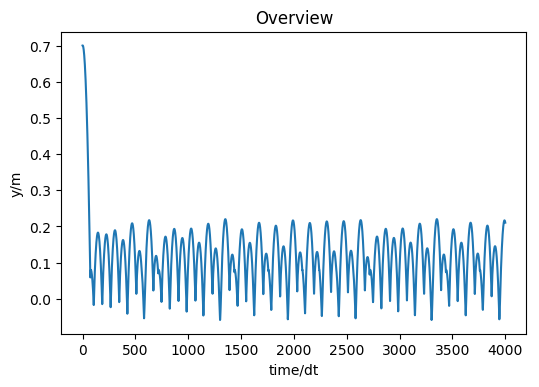

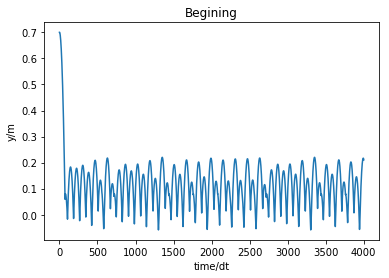

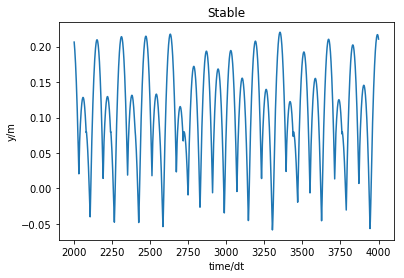

The period of the ball is 0.3440517241379308, which is 1.720258620689654 times the period of the plane.


(0.3440517241379308, 1.720258620689654)

In [50]:
G=-9.8
ball_=ball(0.7,0.10,0.01,0.7)
plane_=plane(0.07,10*3.14)
main(ball_,plane_,num_of_period=100,visual_width=150)

振幅0.07 终态混沌

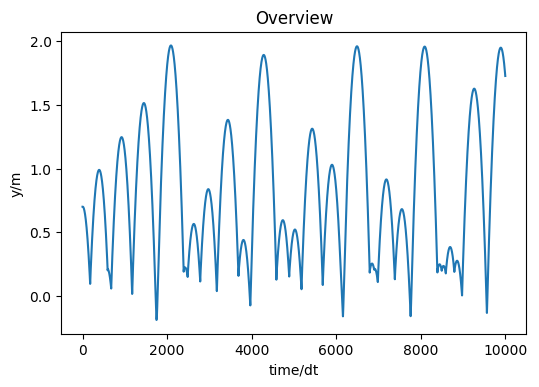

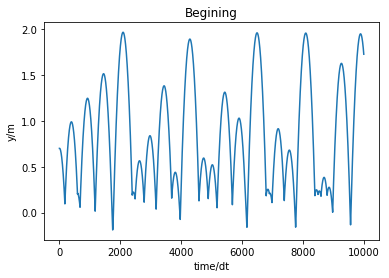

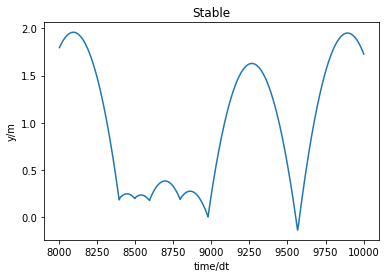

The period of the ball is 0.7325185185185185, which is 3.6625925925925924 times the period of the plane.


(0.7325185185185185, 3.6625925925925924)

In [58]:
G=-9.8
ball_=ball(0.7,0.10,0.01,0.7)
plane_=plane(0.2,10*3.14)
main(ball_,plane_,resolution=100,num_of_period=100,visual_width=120)

### Conslusion.1 同频率下，振幅高产生混沌

### Exploration2. 探索频率对最终状态影响

频率为49pi

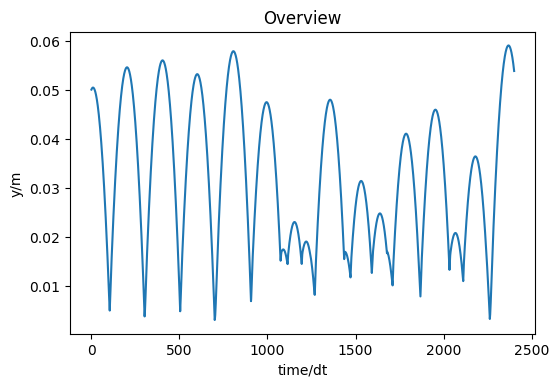

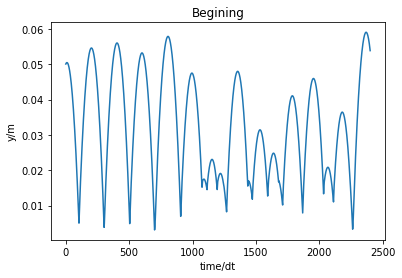

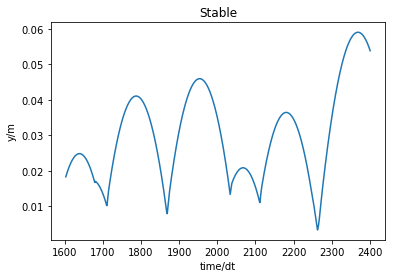

The period of the ball is 0.1337301587301587, which is 3.2763888888888886 times the period of the plane.


(0.1337301587301587, 3.2763888888888886)

In [60]:
G=-9.8
ball_=ball(0.05,0.10,0.01,0.7)
plane_=plane(0.007,49*3.14) #49
main(ball_,plane_,num_of_period=60,visual_width=80)

频率为150pi

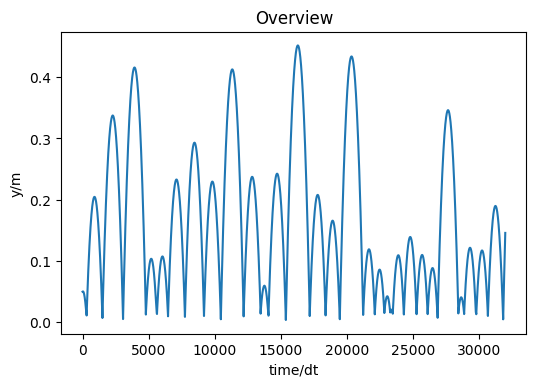

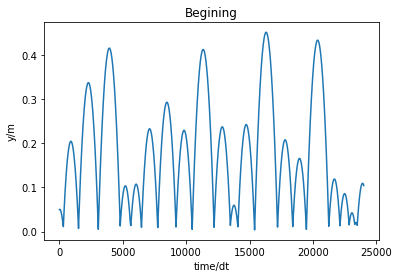

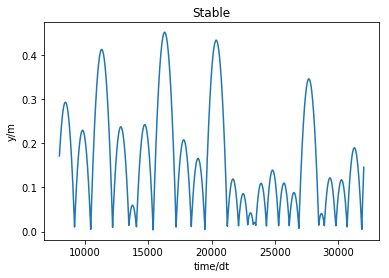

The period of the ball is 0.3252708333333334, which is 24.395312500000003 times the period of the plane.


(0.3252708333333334, 24.395312500000003)

In [31]:
G=-9.8
ball_=ball(0.05,0.10,0.01,0.7)
plane_=plane(0.007,150*3.14)
main(ball_,plane_,num_of_period=800,visual_width=600)

<emp>频率为300pi</emp>

1.频率为300pi 振幅为0.007
出现混沌

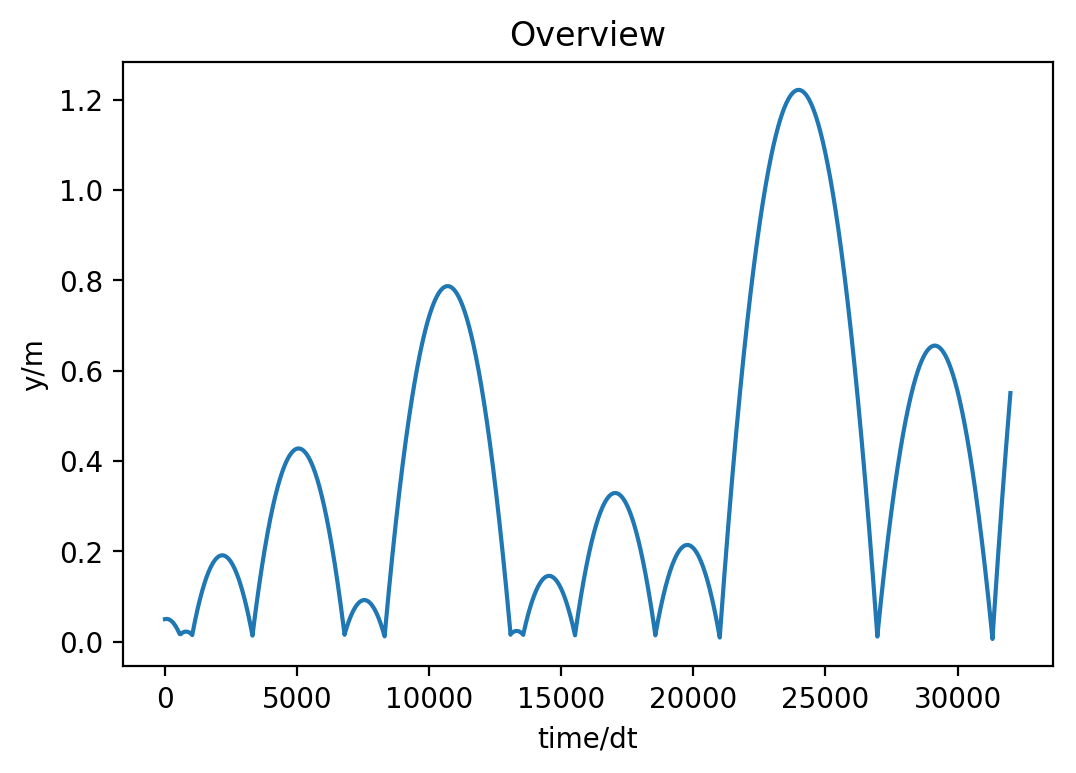

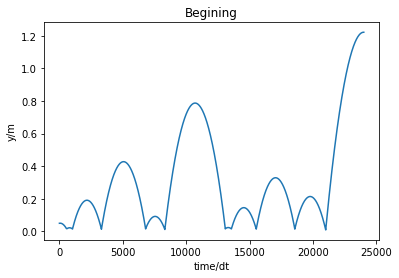

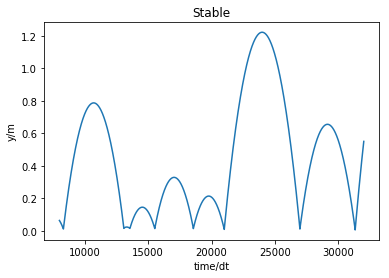

The period of the ball is 0.4038472222222223, which is 60.57708333333334 times the period of the plane.


(0.4038472222222223, 60.57708333333334)

In [32]:
G=-9.8
ball_=ball(0.05,0.10,0.01,0.7)
plane_=plane(0.007,300*3.14)
main(ball_,plane_,num_of_period=800,visual_width=600,visual_dpi=200)

频率为300pi 振幅0.0001 不出现混沌

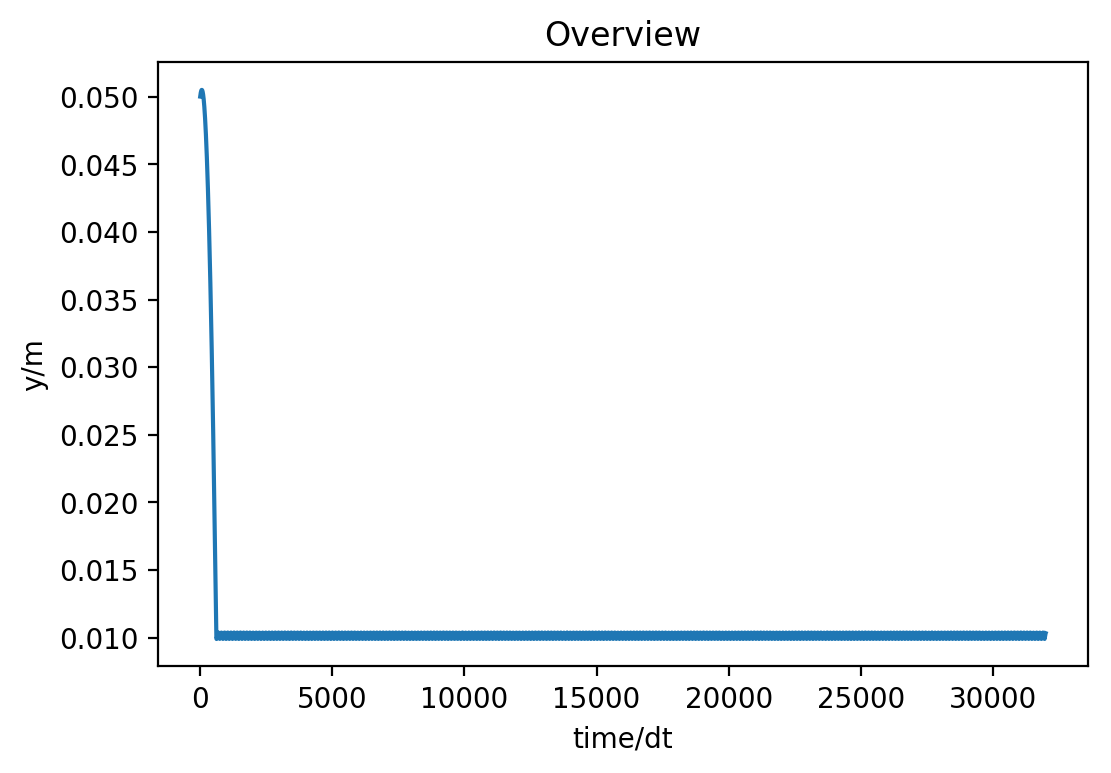

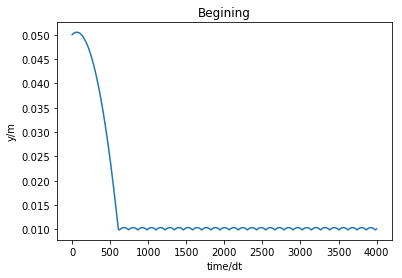

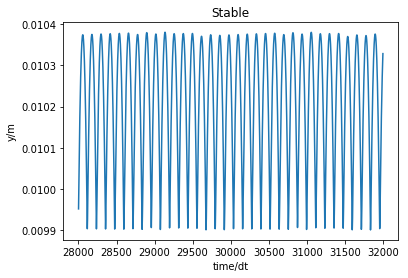

The period of the ball is 0.020330140485312814, which is 3.0495210727969218 times the period of the plane.


(0.020330140485312814, 3.0495210727969218)

In [34]:
G=-9.8
ball_=ball(0.05,0.10,0.01,0.7)
plane_=plane(0.0001,300*3.14)
main(ball_,plane_,num_of_period=800,visual_width=100,visual_dpi=200)

计算频率为1-60pi时小球最终的稳定状态

The period of the ball is 0.20005025125628156, which is 1.0002512562814079 times the period of the plane.
10 finished!
The period of the ball is 0.18186386477843805, which is 1.0002512562814092 times the period of the plane.
11 finished!
The period of the ball is 0.1667085427135682, which is 1.000251256281409 times the period of the plane.
12 finished!
The period of the ball is 0.1538654812524156, which is 1.0001256281407012 times the period of the plane.
13 finished!
The period of the ball is 0.14289303661162928, which is 1.000251256281405 times the period of the plane.
14 finished!
The period of the ball is 0.133366834170854, which is 1.000251256281405 times the period of the plane.
15 finished!
The period of the ball is 0.12504711055276382, which is 1.0003768844221106 times the period of the plane.
16 finished!
The period of the ball is 0.11770617794856605, which is 1.0005025125628115 times the period of the plane.
17 finished!
The period of the ball is 0.11118090452261274, which is

The period of the ball is 0.18888888888888886, which is 7.649999999999998 times the period of the plane.
81 finished!
The period of the ball is 0.18170731707317073, which is 7.449999999999999 times the period of the plane.
82 finished!
The period of the ball is 0.18118628359592218, which is 7.51923076923077 times the period of the plane.
83 finished!
The period of the ball is 0.22097505668934242, which is 9.28095238095238 times the period of the plane.
84 finished!
The period of the ball is 0.17871040723981896, which is 7.595192307692307 times the period of the plane.
85 finished!
The period of the ball is 0.24567183462532294, which is 10.563888888888886 times the period of the plane.
86 finished!
The period of the ball is 0.21124794745484404, which is 9.189285714285717 times the period of the plane.
87 finished!
The period of the ball is 0.21522727272727274, which is 9.47 times the period of the plane.
88 finished!
The period of the ball is 0.22856298048492016, which is 10.17105263157

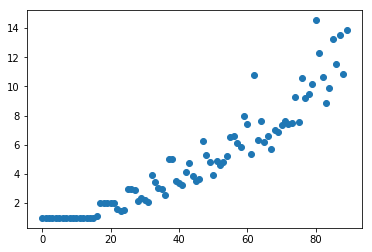

In [108]:
stat=[]
G=-9.8

for w in range(10,100):
    ball_=ball(0.05,0.10,0.01,0.7)
    plane_=plane(0.007,w*3.14)
    stat.append(main(ball_,plane_,num_of_period=200,visual=False))
    print(w,"finished!")
plt.scatter(np.arange(len(stat)),pd.DataFrame(stat).iloc[:,1])
plt.show()

The period of the ball is 0.20005025125628156, which is 1.0002512562814079 times the period of the plane.
10 finished!
The period of the ball is 0.18186386477843805, which is 1.0002512562814092 times the period of the plane.
11 finished!
The period of the ball is 0.1667085427135682, which is 1.000251256281409 times the period of the plane.
12 finished!
The period of the ball is 0.1538654812524156, which is 1.0001256281407012 times the period of the plane.
13 finished!
The period of the ball is 0.14287508973438592, which is 1.0001256281407016 times the period of the plane.
14 finished!
The period of the ball is 0.13335008375209353, which is 1.0001256281407016 times the period of the plane.
15 finished!
The period of the ball is 0.12501570351758795, which is 1.0001256281407036 times the period of the plane.
16 finished!
The period of the ball is 0.11766183860478832, which is 1.0001256281407007 times the period of the plane.
17 finished!
The period of the ball is 0.1111111111111108, which

The period of the ball is 0.13487847222222218, which is 5.395138888888888 times the period of the plane.
80 finished!
The period of the ball is 0.09047782350251489, which is 3.6643518518518525 times the period of the plane.
81 finished!
The period of the ball is 0.09336303939962476, which is 3.827884615384615 times the period of the plane.
82 finished!
The period of the ball is 0.08647316538882806, which is 3.5886363636363643 times the period of the plane.
83 finished!
The period of the ball is 0.09235527544351074, which is 3.878921568627451 times the period of the plane.
84 finished!
The period of the ball is 0.09427370948379349, which is 4.0066326530612235 times the period of the plane.
85 finished!
The period of the ball is 0.10034125379170876, which is 4.314673913043476 times the period of the plane.
86 finished!
The period of the ball is 0.1614942528735632, which is 7.0249999999999995 times the period of the plane.
87 finished!
The period of the ball is 0.11518065268065267, which 

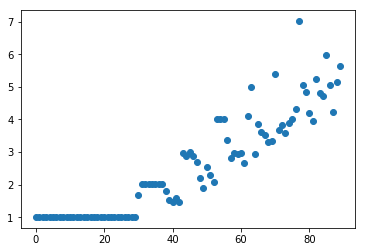

In [109]:
stat=[]
G=-9.8

for w in range(10,100):
    ball_=ball(0.05,0.10,0.01,0.7)
    plane_=plane(0.003,w*3.14)
    stat.append(main(ball_,plane_,num_of_period=200,visual=False))
    print(w,"finished!")
plt.scatter(np.arange(len(stat)),pd.DataFrame(stat).iloc[:,1])
plt.show()

The period of the ball is 0.20005025125628156, which is 1.0002512562814079 times the period of the plane.
10 finished!
The period of the ball is 0.18186386477843805, which is 1.0002512562814092 times the period of the plane.
11 finished!
The period of the ball is 0.1667085427135682, which is 1.000251256281409 times the period of the plane.
12 finished!
The period of the ball is 0.1538654812524156, which is 1.0001256281407012 times the period of the plane.
13 finished!
The period of the ball is 0.14287508973438592, which is 1.0001256281407016 times the period of the plane.
14 finished!
The period of the ball is 0.13335008375209353, which is 1.0001256281407016 times the period of the plane.
15 finished!
The period of the ball is 0.12501570351758795, which is 1.0001256281407036 times the period of the plane.
16 finished!
The period of the ball is 0.11766183860478832, which is 1.0001256281407007 times the period of the plane.
17 finished!
The period of the ball is 0.1111111111111108, which

The period of the ball is 0.05082270408163257, which is 2.032908163265303 times the period of the plane.
80 finished!
The period of the ball is 0.05018896447467887, which is 2.032653061224494 times the period of the plane.
81 finished!
The period of the ball is 0.049583125933300186, which is 2.0329081632653074 times the period of the plane.
82 finished!
The period of the ball is 0.0489857388738628, which is 2.032908163265306 times the period of the plane.
83 finished!
The period of the ball is 0.048408649173955216, which is 2.033163265306119 times the period of the plane.
84 finished!
The period of the ball is 0.047839135654261664, which is 2.033163265306121 times the period of the plane.
85 finished!
The period of the ball is 0.04728286663502615, which is 2.0331632653061247 times the period of the plane.
86 finished!
The period of the ball is 0.04673938540933615, which is 2.0331632653061225 times the period of the plane.
87 finished!
The period of the ball is 0.04620825602968459, whic

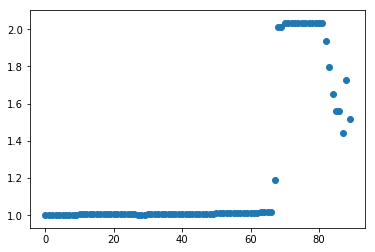

In [107]:
stat=[]
G=-9.8

for w in range(10,100):
    ball_=ball(0.05,0.10,0.01,0.7)
    plane_=plane(0.0008,w*3.14)
    stat.append(main(ball_,plane_,num_of_period=200,visual=False))
    print(w,"finished!")
plt.scatter(np.arange(len(stat)),pd.DataFrame(stat).iloc[:,1])
plt.show()